## Imports

In [40]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE

from sklearn.model_selection import RandomizedSearchCV


# Will They Pay? 
## Predicting Credit Card Client Defaults

<span style="font-size: 20px;">By Rachel Xu</span>


In the credit card industry, the relationship between the company and the client is built on trust. Whether or not a client will pay their bills on time is a risk the company must take—a risk that, if handled poorly, can lead to tremendous financial losses.

In today's modern age, we have the advantage of machine learning to help address this challenge. In this project, I aim to classify whether a client is likely to default their credit card bills based on patterns and characteristics of customer behavior. The findings of this study may provide valuable insights to credit card companies, helping them establish more stable and stronger relationships with clients while minimizing financial losses. 

### Dataset Overview

For this project, I am using the [Default of Credit Card Clients Dataset](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset). This dataset contains 30,000 credit card client examples with 25 features, such as the client's age, payment and bill history, and education. I will be using this data to predict whether a client will default their credit card bills.

The first few rows of the dataset are shown below, with a brief description of its features:

In [3]:
cc_df = pd.read_csv("data/UCI_Credit_Card.csv")
cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**ID**: ID of each client <br>
**LIMIT_BAL**: Amount of given credit in NT dollars <br>
**SEX**: Gender (1=male, 2=female) <br>
**EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) <br>
**MARRIAGE**: Marital status (1=married, 2=single, 3=others) <br>
**AGE**: Age in years <br>
**PAY_0 to PAY_6**: Repayment status from April, 2005 to September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) <br>
**BILL_AMT1 to BILL_AMT6**: Amount of bill statement from April, 2005 to September, 2005 (NT dollar) <br>
**PAY_AMT1 to PAY_AMT6**: Amount of previous payment from April, 2005 to September, 2005 (NT dollar) <br>
**default.payment.next.month**: Default payment (1=yes, 0=no)

The project's prediction target is the "default.payment.next.month" column, where a prediction of **1** means the client will fail to pay their credit card bills next month, and a prediction of **0** means the client will make their payment on time. <br>
The default.payment.next.month chart below provides a quick visualization of the target variable. This chart illustrates that there is a significantly higher number of clients who did not default on their bills than those who did, which is something to keep in mind.

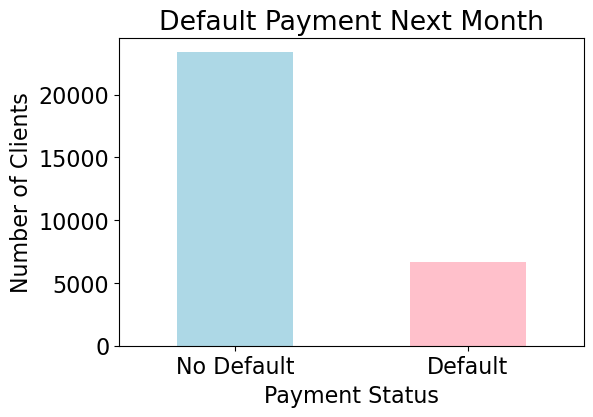

In [4]:
value_counts = cc_df["default.payment.next.month"].value_counts()
plt.figure(figsize=(6, 4))
value_counts.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Default Payment Next Month')
plt.xlabel('Payment Status')
plt.ylabel('Number of Clients')
plt.xticks([0, 1], ['No Default', 'Default'], rotation=0)
plt.show()

## Phases of the Project

The project was divided into several steps in order to arrive at the final results:
1. Preparing the Data
2. Choosing Models
3. Tuning and Improving the Models
4. Testing the Model
5. Results, Summary & Caveats

#### Preparing the Data ####

Before building the predictive model, I first analyzed and organized to make it more efficient and easier to work with. This includes visualizing the data through graphs and identifying any potential relationships between different features and how they may relate to the target variable, default.payment.next.month. I also sorted the features of the data into groups based on their properties (e.g., numerical, categorical, etc.), and adjusted them into a format where they can be easily understood and processed by the model.

#### Choosing Models ####

I tested several machine learning models to find the one that would lead to the best predictive results for this project. 
The models I tried include:
* Dummy Classifier
* Logistic Regression
* Decision Tree Classifier
* K-Nearest Neighbors Classifier
* Random Forest Classifier

I chose to test a variety of models for this project because each model functions differently and uniquely. Some models perform better on data that exhibits a linear pattern (such as logistic regression), while others excel more with non-linear data. In order to assess their performance, I used methods like cross-validation to gauge how well they predicted the default.payment.next.month variable. Through this, I was able to gain some insight on which models might perform the best for this study. This is just a preliminary step, though, as additional work and model tuning could change the outcomes.

#### Tuning and Improving the Models


Next, I focused on fine-tuning the  model to maximize its performance for predicting whether a client would default on their credit card payments. 

<span style="font-size: 16px;">Selecting Most Relevant Features</span>

To start, I first determined which features have the most impact on whether a client defaults or not. This would help me understand the significance of different features and maybe eliminate any unecessary ones. For this feature selection, I used RFECV, and the most relevant features I found were PAY_0, PAY_3, BILL_AMT1, BILL_AMT2, and PAY_AMT1. <br>
Below, I have plotted graphs displaying these five features, with each feature separated into two groups based on whether the client defaulted or not. Some examples of ways to interpret them are below:
* larger values of repayment delay (PAY_0 and PAY_3) are more likely to show up for clients who defaulted, compared to those who did not.
* clients with larger bills to pay (BILL_AMT1 and BILL_AMT2) are more likely to default than those who do not.

With this, it appears that the client's bill amount and payment history are heavily related to whether or not they paid their credit card bill the next month, which makes sense. <br>


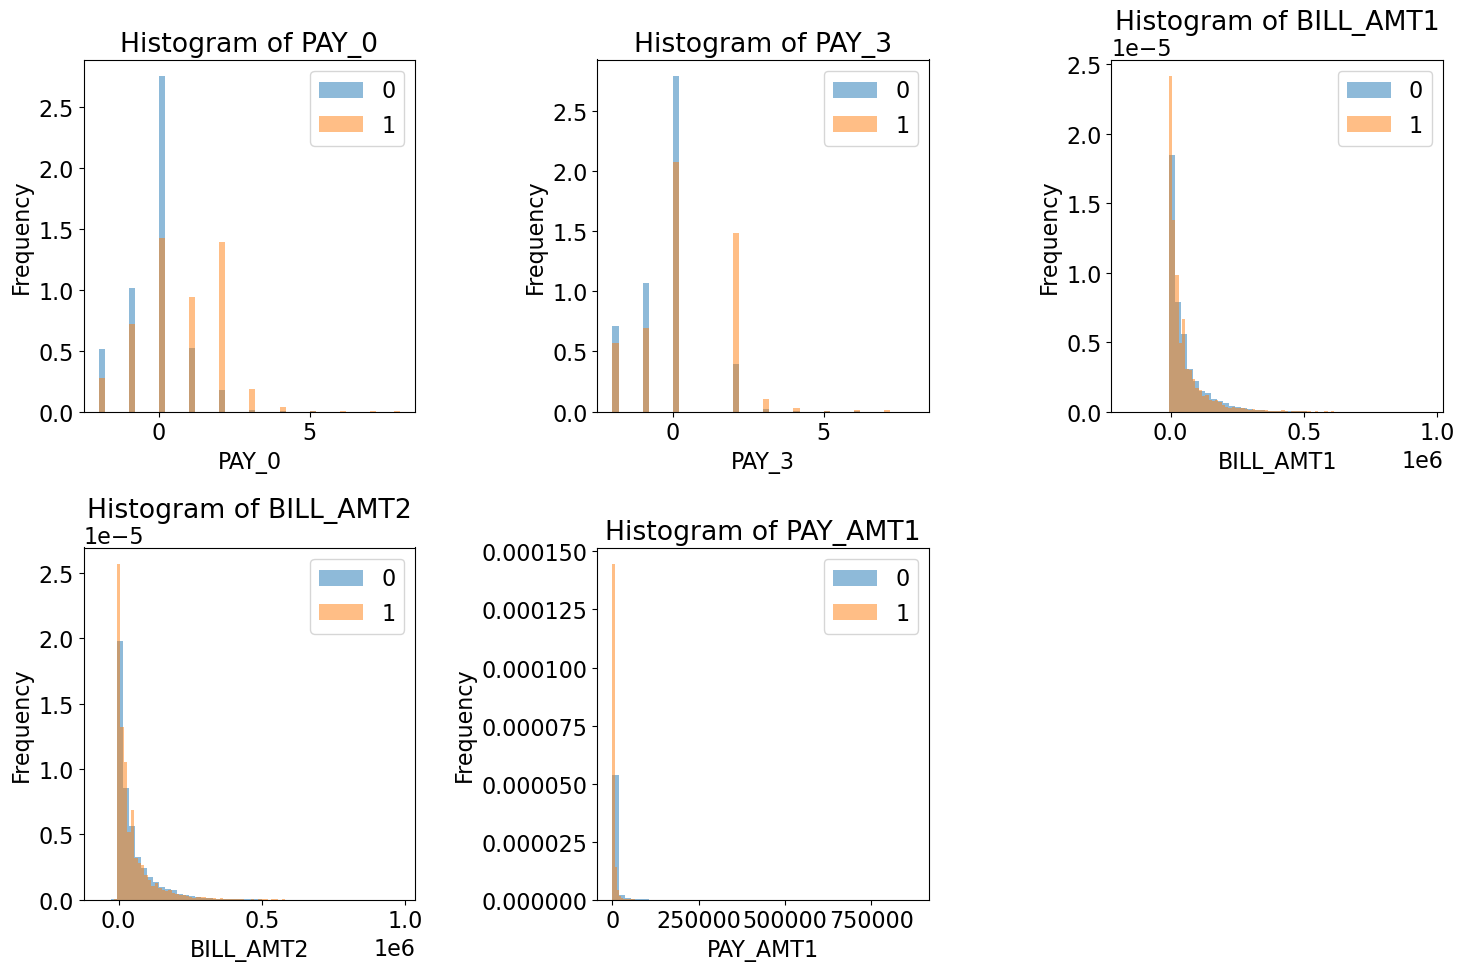

In [36]:
features = ["PAY_0", "PAY_3", "BILL_AMT1", "BILL_AMT2", "PAY_AMT1"]
num_cols = 3  
n_rows = 2
fig, axes = plt.subplots(n_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, feat in enumerate(feats):
    ax = axes[i]
    cc_df.groupby("default.payment.next.month")[feat].plot.hist(
        bins=50,
        alpha=0.5,
        legend=True,
        density=True,
        title="Histogram of " + feat,
        ax=ax
    )
    ax.set_xlabel(feat)
    ax.set_title("Histogram of " + feat)
    
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

I then tested the model using only these five features, but since the accuracy of the model's prediction did not seem to show much improvement, I decided to stick with using the original full set of features. However, this step was still useful as it provided a more in-depth understanding of the features and their relation to the target variable.

<span style="font-size: 16px;">Tuning Model's Hyperparameters</span>

The next step was to make sure that the model performs to the best of its capabilities for this dataset. To do this, I adjusted the specific factors of the model, called hyperparameters, and tested several different combinations of these factors to find the one that resulted in the most accurate predictions. I applied this procedure for: Logistic Regression, DecisionTreeClassifier, K-Nearest Neighbors Classifier, and Random Forest Classifier. I did not do this tuning for the Dummy Classifier due to its poor initial performance. When a model had two or more hyperparameters to tune, I used GridSearchCV and RandomSearchCV, which find the best combination of hyperparameters by testing different values that I provide. For models that only had one hyperparameter to tune, I tested a large range of values using a loop.

After tuning all the models, the model with the highest accuracy and most stable cross-validation scores was the Random Forest Classifier. Hence, I chose it as the final model for this project. <br>
For those interested in more detail, I have included the code below that demonstrates the hyperparameter tuning process of the RandomForestClassifier final model. It outputs the combination of the hyperparameters that leads to the highest predictive accuracy (n_estimators = 120, max_features = log2, and max_depth = 10), as well as the accuracy itself, which is 0.8195 or 81.95%. It is worth noting that this accuracy only reflects how well the model is performing during the tuning and improvement stage. The actual accuracy when the model is used on data it has not seen before may vary.

In [19]:
train_df, test_df = train_test_split(cc_df, test_size = 0.3, random_state=123)
target = "default.payment.next.month"
X_train = train_df.drop(columns = [target])
y_train = train_df[target]
X_test = test_df.drop(columns = [target])
y_test = test_df[target]

In [20]:
param_grid_rf = {"n_estimators": [1,50,100,120,200],
                 "max_depth": [None, 1, 10, 15, 20, 50, 100],
                 "max_features": ["sqrt", "log2", None]}
rf_opt = RandomForestClassifier(random_state = 123)
rf_search = RandomizedSearchCV(rf_opt, param_grid_rf, n_iter = 100, n_jobs = -1, random_state = 123)
rf_search.fit(X_train, y_train)
rf_best_params = rf_search.best_params_
rf_best_score = rf_search.best_score_
print(rf_best_params)
print(rf_best_score)  

{'n_estimators': 120, 'max_features': 'log2', 'max_depth': 10}
0.8195238095238097


#### Testing the Model

In this stage of the project, I tested my final Random Forest Classifier model on data it had not seen before. This assesses how well the model will perform in the "real world" when it deals with new data.
Using a subset of the [Default of Credit Card Clients Dataset](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset) that was not used to build the model, the following are the statistics of the model's performance on new data.

The model achieved an **accuracy score of 0.82222**, meaning it was able to correctly predict 82.22% of the clients to whether or not they defaulted on their credit card bills the following month.

When the model predicted that the client would default, it was correct 65.85% of the time.

Furthermore, out of all the clients who defaulted, the model correctly identified 37.11% of them while it failed to identify 62.89% of them.

Regarding the balance between the model's predictions and its errors, the model achieved a score of 47.47%.

Below, I have included a confusion matrix illustrating the model's predictions of default.payment.next.month for clients in the unseen data. The model made 6677 correct predictions and 375 incorrect predictions for non-defaulting clients. The model predicted 723 correct predictions and 1225 incorrect predictions for defaulting clients. These values align with the statistics presented above. 

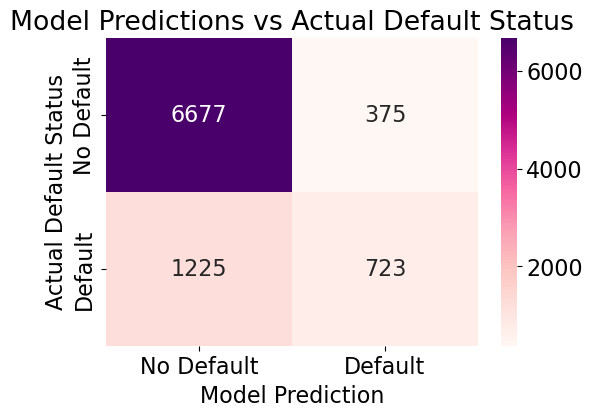

In [57]:
rf_final = RandomForestClassifier(random_state = 123, n_estimators = 120, max_features = "log2", max_depth = 10)
rf_final.fit(X_train, y_train)
predictions = rf_final.predict(X_test)

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', 
            cmap="RdPu", 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.xlabel('Model Prediction')
plt.ylabel('Actual Default Status')
plt.title('Model Predictions vs Actual Default Status')
plt.show()

#### Results, Summary & Caveats

After testing the Random Forest Classifier model on unseen data, the accuracy score increased to 82.22%, up from 81.95%. The similarity in the two accuracy scores suggests that the model is performing consistently and in parallel to how we expected it to when used on new examples of clients. <br>
However, the high accuracy score may be misleading. From the statistics above, the model only correctly identified clients who defaulted on their credit card bills 37.11% of the time. This is quite a disappointing result. Some potential reasons for this may be due to class imbalance, which was brought up at the beginning of this project. Since there are significantly more examples of non-defaulting clients in the dataset, the high accuracy may be from the model correctly predicting clients who did not default, but less of those who did default. Hence, to work to overcome this, I plan to explore methods that minimize class imbalance and see if it improves the model's overall performance. <br>
Another reason for the model's inaccurate predictions could be that it is unable to fully capture the relationships between features and within the data, making it difficult to take them into account when predicting new data. In other words, the model's ability to generalize on this dataset may be limited, and it may struggle to capture all its complex characteristics. <br>
Lastly, although the Random Forest Classifier model performed well and consistently during both the building and testing phases, there still remains a risk of overfitting. Since the Random Forest Classifier was built with a large number of features in consideration, the model would be very complex. This would cause the model to learn very specific details or patterns based on the data it was built with, patterns that are less applicable to new data.  

## My Takeaway

Exploring the field of machine learning through this project and applying the lessons that I learned in class to a practical real-world scenario has been an incredibly engaging and enlightening journey. This project deepened my understanding of many of the concepts I have been learning, from broad topics such as the methods used to build the best model, to more specific ones like using RFECV and creating different types of graphs for various uses. I have also discovered many more areas of interest, such as addressing class imbalance and experimenting with more complex models, and I am excited to continue exploring these topics and intrigued to see what else can be accomplished.